<a href="https://colab.research.google.com/github/sanjana110404/SCT_DS_1/blob/main/SCT_DS_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report






In [25]:
# Load the Bank Marketing dataset
bank_marketing = pd.read_csv("/content/bank-additional-full.csv", skipinitialspace=True,sep=';')


In [26]:
df = pd.DataFrame(bank_marketing)

# Preview the dataset
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [27]:
bank_marketing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [28]:
bank_marketing.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [29]:
bank_marketing.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [30]:
bank_marketing.duplicated().sum()

12

In [31]:
#Function to count outliers based on IQR
def count_outliers_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

# Iterate through each column in the DataFrame
for column in bank_marketing.columns:
    if bank_marketing[column].dtype in [np.int64, np.float64]:  # Only consider numerical columns
        total_outliers = count_outliers_iqr(bank_marketing[column])
        print(f"Total outliers in {column}: {total_outliers}")

Total outliers in age: 469
Total outliers in duration: 2963
Total outliers in campaign: 2406
Total outliers in pdays: 1515
Total outliers in previous: 5625
Total outliers in emp.var.rate: 0
Total outliers in cons.price.idx: 0
Total outliers in cons.conf.idx: 447
Total outliers in euribor3m: 0
Total outliers in nr.employed: 0


<Axes: xlabel='age', ylabel='Count'>

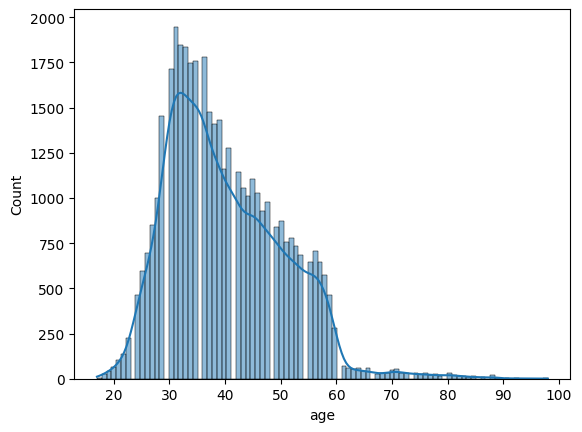

In [35]:
sns.histplot(x = bank_marketing['age'],kde = True)

<Axes: xlabel='duration', ylabel='Count'>

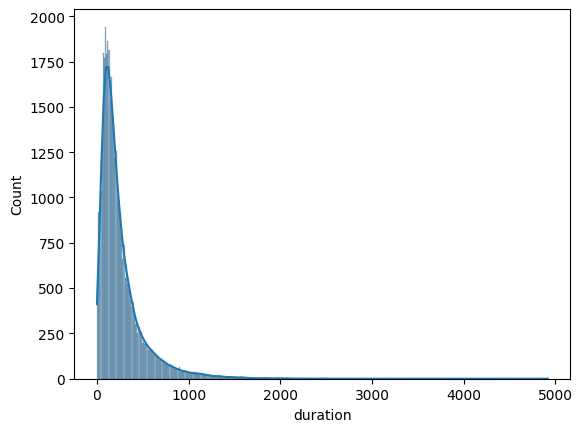

In [36]:
sns.histplot(x = bank_marketing['duration'],kde = True)

<Axes: xlabel='campaign', ylabel='Count'>

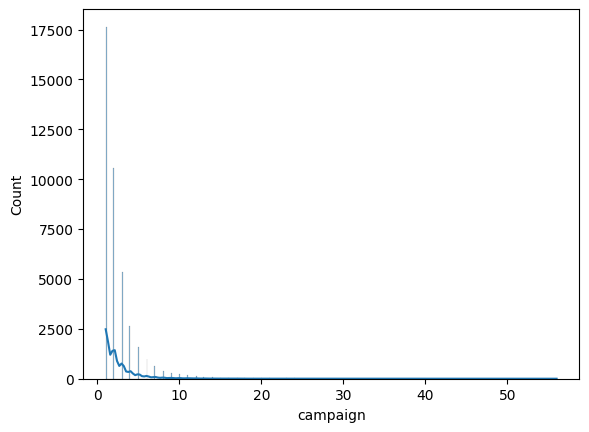

In [37]:
sns.histplot(x = bank_marketing['campaign'],kde = True)

<Axes: xlabel='pdays', ylabel='Count'>

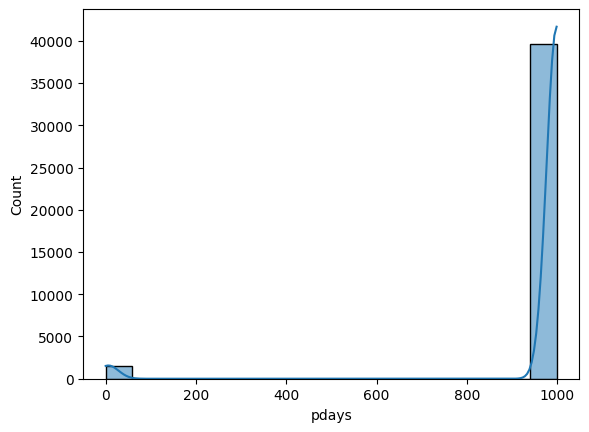

In [38]:
sns.histplot(x = bank_marketing['pdays'],kde = True)

<Axes: xlabel='previous', ylabel='Count'>

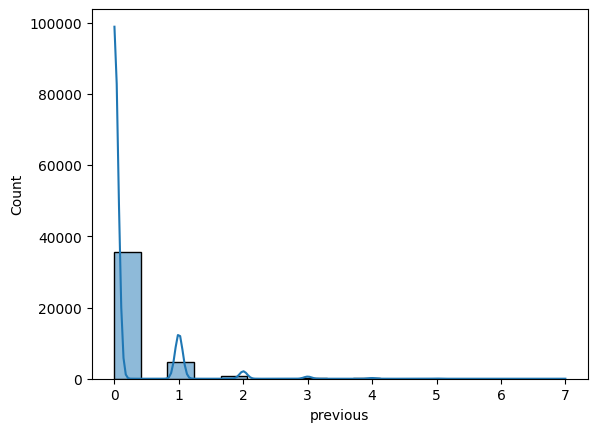

In [39]:
sns.histplot(x = bank_marketing['previous'],kde = True)


<Axes: >

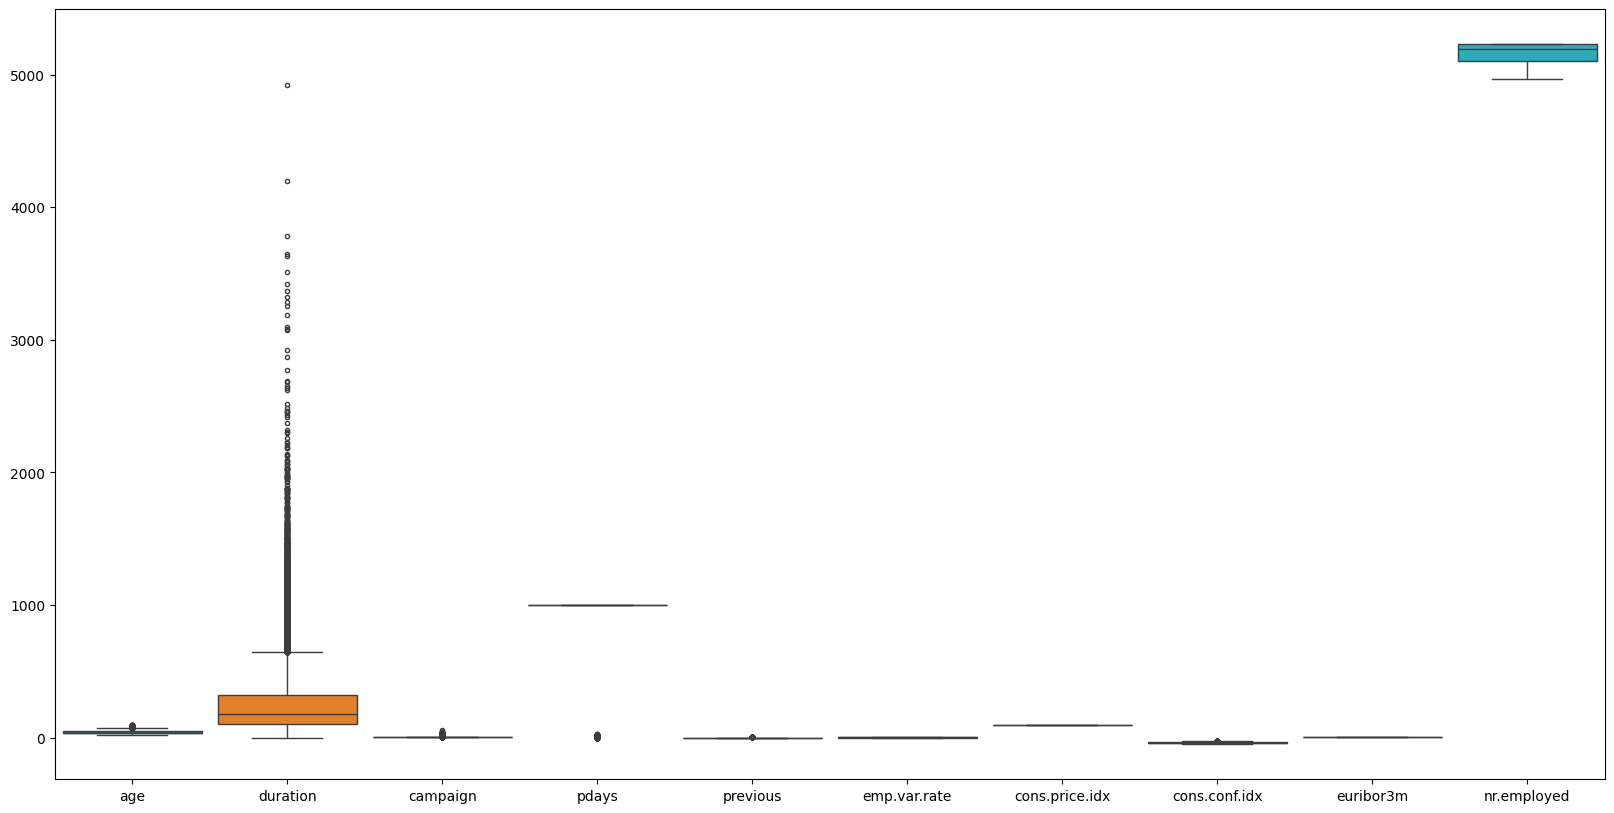

In [32]:
fig,ax = plt.subplots(figsize = (20,10))
sns.boxplot(data = bank_marketing,width = 0.9,fliersize = 3)

In [33]:
# Sum of counts of zeros for each column
zeros_sum = (bank_marketing == 0).sum()

print(zeros_sum)

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              4
campaign              0
pdays                15
previous          35563
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64


In [47]:
X = bank_marketing[['age','job','marital','education','default','housing','loan','contact','month','duration','campaign','pdays','previous','poutcome']]
X

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,334,1,999,0,nonexistent
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,383,1,999,0,nonexistent
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,189,2,999,0,nonexistent
41186,44,technician,married,professional.course,no,no,no,cellular,nov,442,1,999,0,nonexistent


In [48]:
X = pd.get_dummies(X,columns=['job','marital','education','default','housing','loan','contact','month','poutcome'])
X

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
1,57,149,1,999,0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,37,226,1,999,0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,40,151,1,999,0,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,56,307,1,999,0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
41184,46,383,1,999,0,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
41185,56,189,2,999,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
41186,44,442,1,999,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [50]:
columns_to_scale = ['age','duration','campaign','pdays','previous']
scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [51]:
X

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,0.195414,-0.349494,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
41184,0.573445,0.481012,-0.565922,0.195414,-0.349494,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
41185,1.533034,-0.267225,-0.204909,0.195414,-0.349494,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
41186,0.381527,0.708569,-0.565922,0.195414,-0.349494,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [42]:
y = bank_marketing[['y']]
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
41183,yes
41184,no
41185,no
41186,yes


In [43]:
y = pd.get_dummies(y,columns=['y'])
y

,y_no,y_yes
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
41183,False,True
41184,True,False
41185,True,False
41186,False,True


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [53]:
X_train

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
10685,1.149199,1.611082,-0.204909,0.195414,-0.349494,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
224,-0.002309,-0.348220,-0.565922,0.195414,-0.349494,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
29638,-1.153816,-0.274939,-0.565922,0.195414,-0.349494,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4804,1.149199,-0.733909,-0.565922,0.195414,-0.349494,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
11614,-0.482104,-0.683769,-0.204909,0.195414,-0.349494,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,1.149199,1.159825,-0.204909,0.195414,-0.349494,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
32103,1.533034,-0.355933,-0.565922,0.195414,-0.349494,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
30403,-1.057857,0.650716,0.156105,0.195414,-0.349494,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
21243,-0.482104,-0.568062,-0.565922,0.195414,-0.349494,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [54]:
X_test

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
15500,-0.098268,1.452949,0.156105,0.195414,-0.349494,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
29034,1.437075,-0.039668,-0.204909,0.195414,-0.349494,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
11199,-0.098268,-0.197801,-0.565922,0.195414,-0.349494,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
22247,1.533034,-0.317364,1.600159,0.195414,-0.349494,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
27180,0.861322,0.049040,-0.565922,0.195414,-0.349494,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33745,-1.537652,-0.352076,-0.565922,0.195414,-0.349494,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
8263,-0.002309,-0.899755,-0.565922,0.195414,-0.349494,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
24069,-0.769980,-0.938324,-0.565922,0.195414,-0.349494,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
15531,-0.290186,-0.024241,1.239145,0.195414,-0.349494,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [55]:
y_train

,y_no,y_yes
10685,False,True
224,True,False
29638,True,False
4804,True,False
11614,True,False
...,...,...
20757,True,False
32103,True,False
30403,False,True
21243,True,False


In [56]:
y_test

,y_no,y_yes
15500,False,True
29034,True,False
11199,True,False
22247,True,False
27180,True,False
...,...,...
33745,True,False
8263,True,False
24069,True,False
15531,True,False


In [57]:
# Initialize your model
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Make predictions on the testing set
test_predictions = model.predict(X_test)

# Calculate training accuracy
DecisionTreeClassifier_train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {DecisionTreeClassifier_train_accuracy}')

# Calculate testing accuracy
DecisionTreeClassifier_test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Testing Accuracy: {DecisionTreeClassifier_test_accuracy}')

print("\nClassification Report (Training Data):")
print(classification_report(y_train, train_predictions))

print("\nClassification Report (Testing Data):")
print(classification_report(y_test, test_predictions))

Training Accuracy: 1.0
Testing Accuracy: 0.8788967660483636

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27409
           1       1.00      1.00      1.00      3482

   micro avg       1.00      1.00      1.00     30891
   macro avg       1.00      1.00      1.00     30891
weighted avg       1.00      1.00      1.00     30891
 samples avg       1.00      1.00      1.00     30891


Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      9139
           1       0.46      0.47      0.47      1158

   micro avg       0.88      0.88      0.88     10297
   macro avg       0.70      0.70      0.70     10297
weighted avg       0.88      0.88      0.88     10297
 samples avg       0.88      0.88      0.88     10297



In [58]:
# Print the results
print("DecisionTreeClassifier:")
print(f'Training Accuracy: {DecisionTreeClassifier_train_accuracy}')
print(f'Testing Accuracy: {DecisionTreeClassifier_test_accuracy}\n')

DecisionTreeClassifier:
Training Accuracy: 1.0
Testing Accuracy: 0.8788967660483636

